Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdata
from datetime import date
import yfinance as yf
from plotly import graph_objs as go
import plotly.express as px
import plotly.io as pio

Downloading the Data

In [ ]:
start="2015-01-01"
today=date.today().strftime("%Y-%m-%d")

data=yf.download('GOOG',start,today)
data=data.reset_index()
data=data.drop(['Adj Close'],axis=1)

[*********************100%%**********************]  1 of 1 completed


Raw Data Preview

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-02,26.378078,26.490770,26.133251,26.168653,28951268
1,2015-01-05,26.091366,26.144720,25.582764,25.623152,41196796
2,2015-01-06,25.679497,25.738087,24.983908,25.029282,57998800
3,2015-01-07,25.280592,25.292759,24.914099,24.986401,41301082
4,2015-01-08,24.831326,25.105074,24.482782,25.065184,67071641


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Volume
2187,2023-09-12,137.130005,137.639999,135.929993,136.070007,15212900
2188,2023-09-13,135.899994,137.699997,134.929993,137.500000,16394900
2189,2023-09-14,138.389999,139.550003,137.059998,138.990005,19064600
2190,2023-09-15,138.800003,139.360001,137.179993,138.300003,48947600
2191,2023-09-18,137.630005,139.929993,137.630005,138.960007,16218800


In [ ]:
df=data.drop(['Date'],axis=1)
df.describe().drop(['count'],axis=0)

,Open,High,Low,Close,Volume
mean,71.540033,72.318840,70.820268,71.584896,3.234111e+07
std,35.361407,35.798585,34.963972,35.375707,1.554993e+07
min,24.664783,24.730902,24.311253,24.560070,6.936000e+06
25%,41.382376,41.578501,41.197125,41.448499,2.282550e+07
50%,58.969000,59.497250,58.371300,58.986752,2.847100e+07
75%,101.045000,102.606247,100.017748,101.341627,3.682905e+07
max,151.863495,152.100006,149.887497,150.709000,2.232980e+08


In [ ]:
fig=go.Figure();
fig.add_trace(go.Scatter(x=data['Date'],y=data['Open'],name='Stock Open'))
fig.add_trace(go.Scatter(x=data['Date'],y=data['Close'],name='Stock Close'))
fig.update_layout(title='Time Series Data',xaxis_rangeslider_visible=True,template='plotly_dark')
fig.show()

c:\Users\ANUJ SARKAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
figure = go.Figure(data=[go.Candlestick(x=data['Date'],open=data['Open'],high=data['High'],low=data['Low'],close=data['Close'])])
figure.update_layout(title='Time Series Data',xaxis_rangeslider_visible=True,height=600)
figure.show()

In [ ]:
# fig=px.bar(data,x='Date',y='Close',color='Close')
# fig.show()

In [ ]:
fig = px.line(data,x='Date',y='Close',title='Stock closing price with time period selector')
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=3, label='3m', step='month', stepmode='backward'),
            dict(count=6, label='6m',step='month', stepmode='backward'),
            dict(count=1, label='1y',step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.update_layout(template='seaborn')
fig.show()

In [ ]:
ma100=data.Close.rolling(100).mean()

In [ ]:
ma200=data.Close.rolling(200).mean()

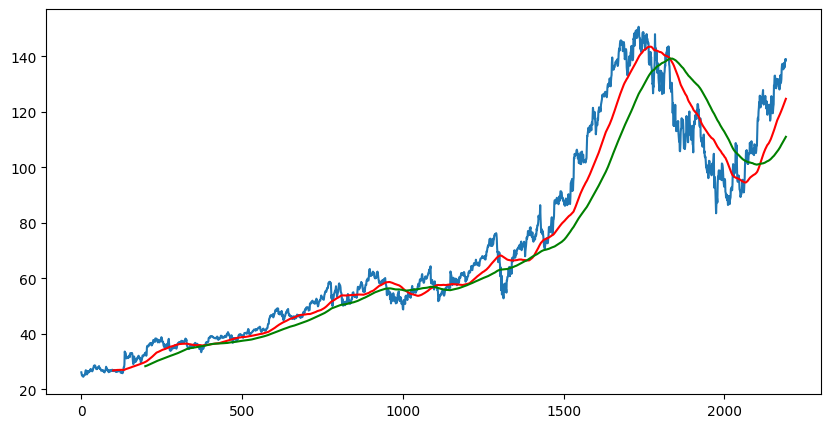

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

Training and Testing

In [ ]:
data_training=pd.DataFrame(data['Close'][0:int(len(data)*0.7)])
data_testing=pd.DataFrame(data['Close'][int(len(data)*0.7):int(len(data))])

print(data_training.shape)
print(data_testing.shape)

(1534, 1)
(658, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array=scaler.fit_transform(data_training)

In [ ]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

ML Model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(.5))

model.add(Dense(units=1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
45/45 [==============================] - 13s 174ms/step - loss: 0.0324
Epoch 2/50
45/45 [==============================] - 8s 178ms/step - loss: 0.0073
Epoch 3/50
45/45 [==============================] - 7s 153ms/step - loss: 0.0061
Epoch 4/50
45/45 [==============================] - 7s 164ms/step - loss: 0.0053
Epoch 5/50
45/45 [==============================] - 8s 178ms/step - loss: 0.0057
Epoch 6/50
45/45 [==============================] - 8s 188ms/step - loss: 0.0051
Epoch 7/50
45/45 [==============================] - 9s 202ms/step - loss: 0.0048
Epoch 8/50
45/45 [==============================] - 10s 216ms/step - loss: 0.0043
Epoch 9/50
45/45 [==============================] - 7s 154ms/step - loss: 0.0042
Epoch 10/50
45/45 [==============================] - 8s 178ms/step - loss: 0.0038
Epoch 11/50
45/45 [==============================] - 8s 178ms/step - loss: 0.0045
Epoch 12/50
45/45 [==============================] - 9s 193ms/step - loss: 0.0037
Epoch 13/50
45/45 [====

KeyboardInterrupt: 

In [ ]:
model.save('keras_model.h5')

c:\Users\ANUJ SARKAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_data=[past_100_days,data_testing]
final_data=pd.concat(final_data)
final_data.head()

,Close
1433,76.036003
1434,75.963997
1435,77.071999
1436,76.044998
1437,74.776497


In [ ]:
input_data=scaler.fit_transform(final_data)

In [ ]:
x_test=[];
y_test=[];

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)

In [ ]:
y_predicted=model.predict(x_test)

21/21 [==============================] - 2s 68ms/step


In [ ]:
scaler.scale_

array([0.01250805])

In [ ]:
scale_factor=1/.01250805
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

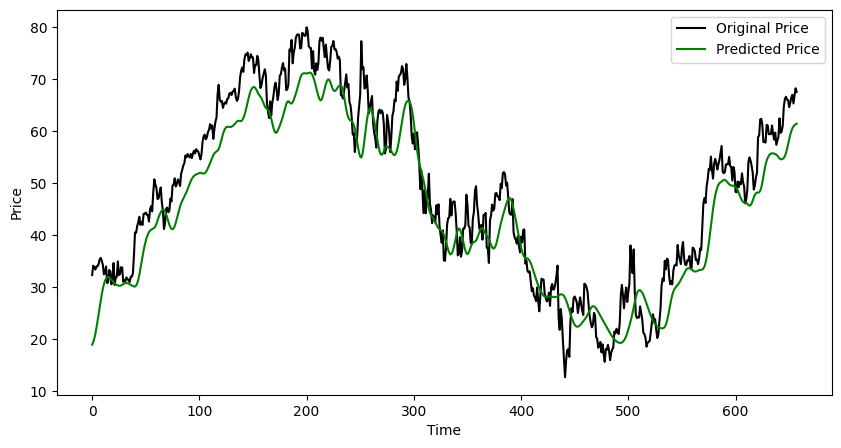

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test,'black',label='Original Price')
plt.plot(y_predicted,'green', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()